In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
import KeyFunctions as me
RandState = 117

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:100: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:100: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:100: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:130: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:130: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:130: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

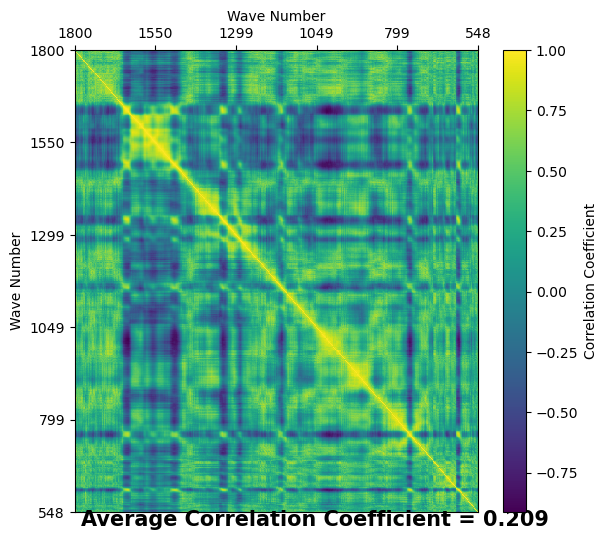

In [2]:
import matplotlib.ticker as mticker
from sklearn.preprocessing import normalize

tempR6g, labels = me.ConstructCombinedDataset()
tempR6g = pd.DataFrame(normalize(tempR6g), index = tempR6g.index, columns = tempR6g.columns)

corr = tempR6g.corr(method = 'spearman')

stwave = max(tempR6g.columns)
endwave = min(tempR6g.columns)

fig = plt.pcolormesh(corr, figure = plt.figure(figsize = [6.5, 6]));
plt.colorbar(label = 'Correlation Coefficient');
ax = plt.gca()
ax.set_title('');
ax.set_xlabel("Wave Number")
ax.set_ylabel("Wave Number")
ax.xaxis.set_label_position('top')

ticks_loc = np.linspace(0, np.shape(tempR6g)[1], 6)
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ticklbls = np.linspace(stwave, endwave, 6)
ticklbls = ticklbls.astype(int)
ax.set_xticklabels(ticklbls)
ax.set_yticklabels(ticklbls)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()

fz = np.arctanh(corr)
fz[fz == np.inf] = np.nan
fzavg = np.nanmean(fz)
ravg = np.tanh(fzavg)
ravg = round(ravg, 4)
plt.annotate('Average Correlation Coefficient = ' + str(ravg), [0.125, 0.055], xycoords = 'figure fraction', fontsize = 15, fontweight = 'bold');
plt.savefig("Tables and Figures/SVG Files/R6g Correlation Plot.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures/PNG Files/R6g Correlation Plot.png", format = "png", bbox_inches='tight')

In [3]:
display(corr.iloc[450, :].sort_values(ascending = False).iloc[0:20])
corr.index.get_loc(1382.716797)

608.554688     1.000000
611.398438     0.912033
769.099609     0.830095
771.890625     0.825944
766.308594     0.813777
605.712891     0.781866
1506.423828    0.781558
1503.865234    0.781266
774.679688     0.776272
1645.968750    0.775814
1643.453125    0.771419
1648.484375    0.769051
1501.306641    0.763441
1508.982422    0.757412
1359.318359    0.756284
1356.712891    0.751431
1651.000000    0.732572
1511.539063    0.728201
1361.919922    0.716349
614.240234     0.716285
Name: 608.554688, dtype: float64

165

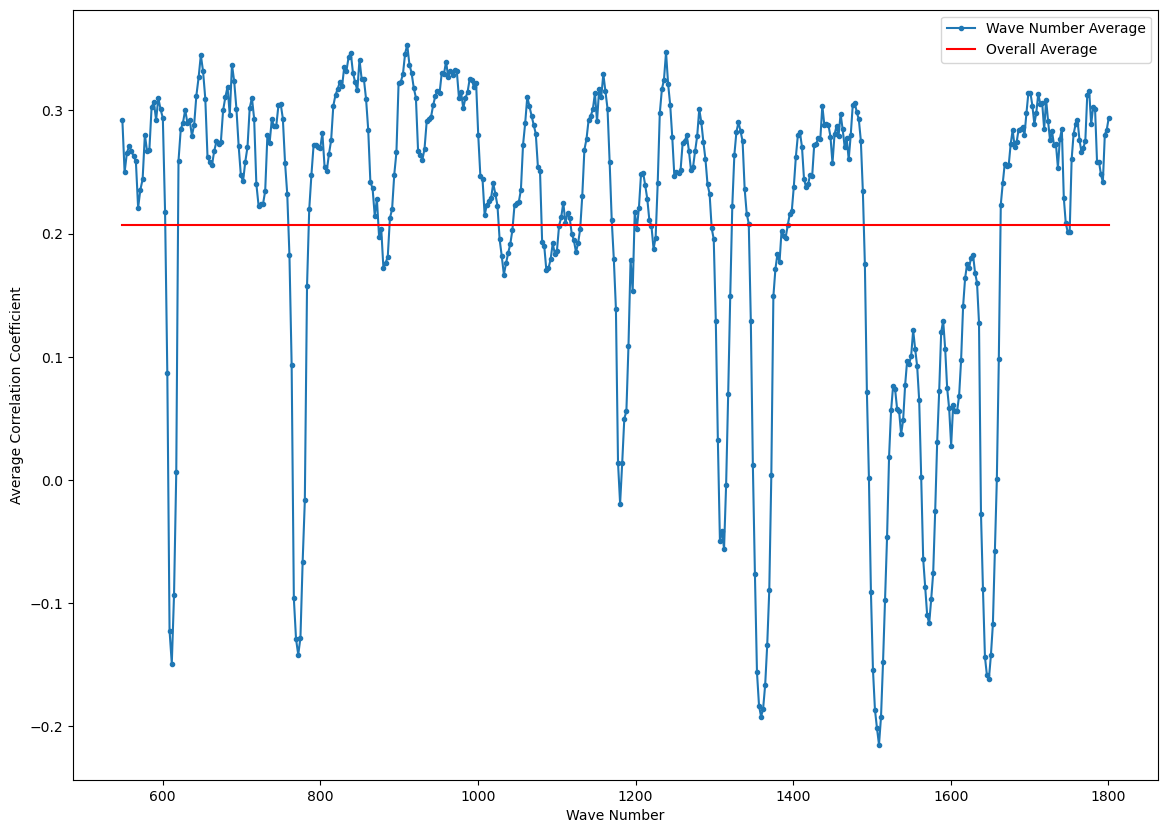

In [4]:
fz = np.arctanh(corr)
fz[fz == np.inf] = np.nan
fzavg = np.nanmean(fz, axis = 1)
ravg = np.tanh(fzavg)

plt.plot(corr.columns, ravg, marker = '.',  figure = plt.figure(figsize = [14, 10]));
plt.plot(corr.columns, np.ones((len(corr.columns),1))*np.nanmean(ravg), 'r')
plt.ylabel("Average Correlation Coefficient")
plt.xlabel("Wave Number");
plt.legend(["Wave Number Average", "Overall Average"]);

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:203: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:203: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:203: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

/Users/vish/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


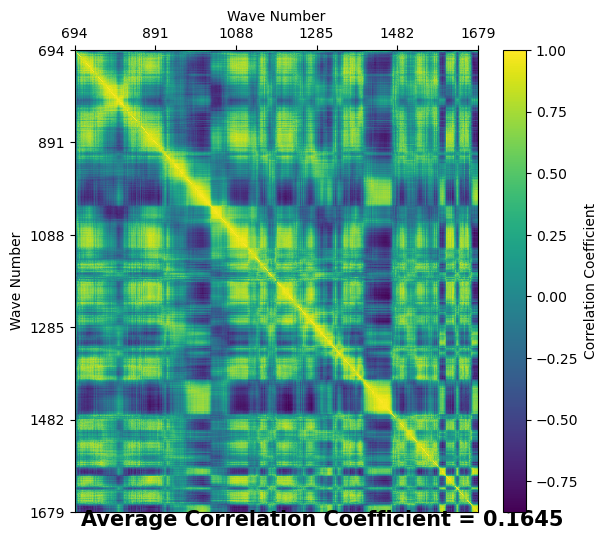

In [5]:
tempTri, labels = me.ConstructCombinedTriclosanDataset()
tempTri = pd.DataFrame(normalize(tempTri), index = tempTri.index, columns = tempTri.columns)

corr = tempTri.corr(method = 'spearman')

stwave = min(tempTri.columns)
endwave = max(tempTri.columns)

fig = plt.pcolormesh(corr, figure = plt.figure(figsize = [6.5, 6]));
plt.colorbar(label = 'Correlation Coefficient');
ax = plt.gca()
ax.set_title('');
ax.set_xlabel("Wave Number")
ax.set_ylabel("Wave Number")
ax.xaxis.set_label_position('top')

ticks_loc = np.linspace(0, np.shape(tempTri)[1], 6)
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ticklbls = np.linspace(stwave, endwave, 6)
ticklbls = ticklbls.astype(int)
ax.set_xticklabels(ticklbls)
ax.set_yticklabels(ticklbls)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()

fz = np.arctanh(corr)
fz[fz == np.inf] = np.nan
fzavg = np.nanmean(np.nanmean(fz))
ravg = np.tanh(fzavg)
ravg = round(ravg, 4)
plt.annotate('Average Correlation Coefficient = ' + str(ravg), [0.125, 0.055], xycoords = 'figure fraction', fontsize = 15, fontweight = 'bold');
plt.savefig("Tables and Figures/SVG Files/Triclosan Correlation Plot.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures/PNG Files/Triclosan Correlation Plot.png", format = "png", bbox_inches='tight')

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

/Users/vish/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


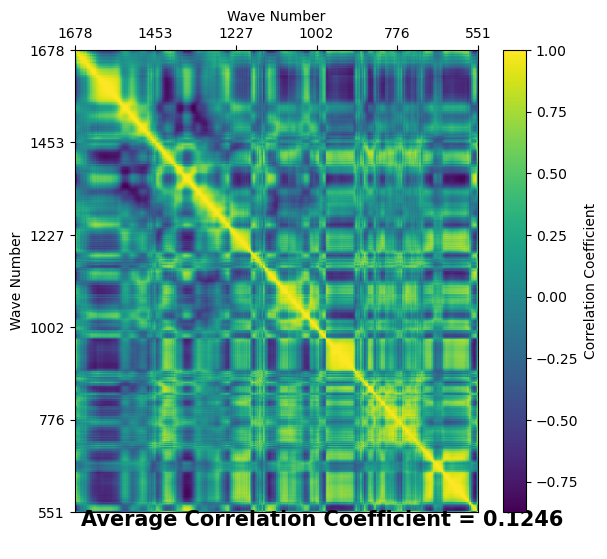

In [6]:
tempChlor, labels = me.ConstructCombinedChlorDataset()
tempChlor = pd.DataFrame(normalize(tempChlor), index = tempChlor.index, columns = tempChlor.columns)

corr = tempChlor.corr(method = 'spearman')

stwave = max(tempChlor.columns)
endwave = min(tempChlor.columns)

fig = plt.pcolormesh(corr, figure = plt.figure(figsize = [6.5, 6]));
plt.colorbar(label = 'Correlation Coefficient');
ax = plt.gca()
ax.set_title('');
ax.set_xlabel("Wave Number")
ax.set_ylabel("Wave Number")
ax.xaxis.set_label_position('top')

ticks_loc = np.linspace(0, np.shape(tempChlor)[1], 6)
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ticklbls = np.linspace(stwave, endwave, 6)
ticklbls = ticklbls.astype(int)
ax.set_xticklabels(ticklbls)
ax.set_yticklabels(ticklbls)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()

fz = np.arctanh(corr)
fz[fz == np.inf] = np.nan
fzavg = np.nanmean(fz)
ravg = np.tanh(fzavg)
ravg = round(ravg, 4)
plt.annotate('Average Correlation Coefficient = ' + str(ravg), [0.125, 0.055], xycoords = 'figure fraction', fontsize = 15, fontweight = 'bold');
plt.savefig("Tables and Figures/SVG Files/Chlorpyrifos Correlation Plot.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures/PNG Files/Chlorpyrifos Correlation Plot.png", format = "png", bbox_inches='tight')

In [7]:
corrR6g = tempR6g.corr(method = 'spearman')
corrTri = tempTri.corr(method = 'spearman')
corrChlor = tempChlor.corr(method = 'spearman')

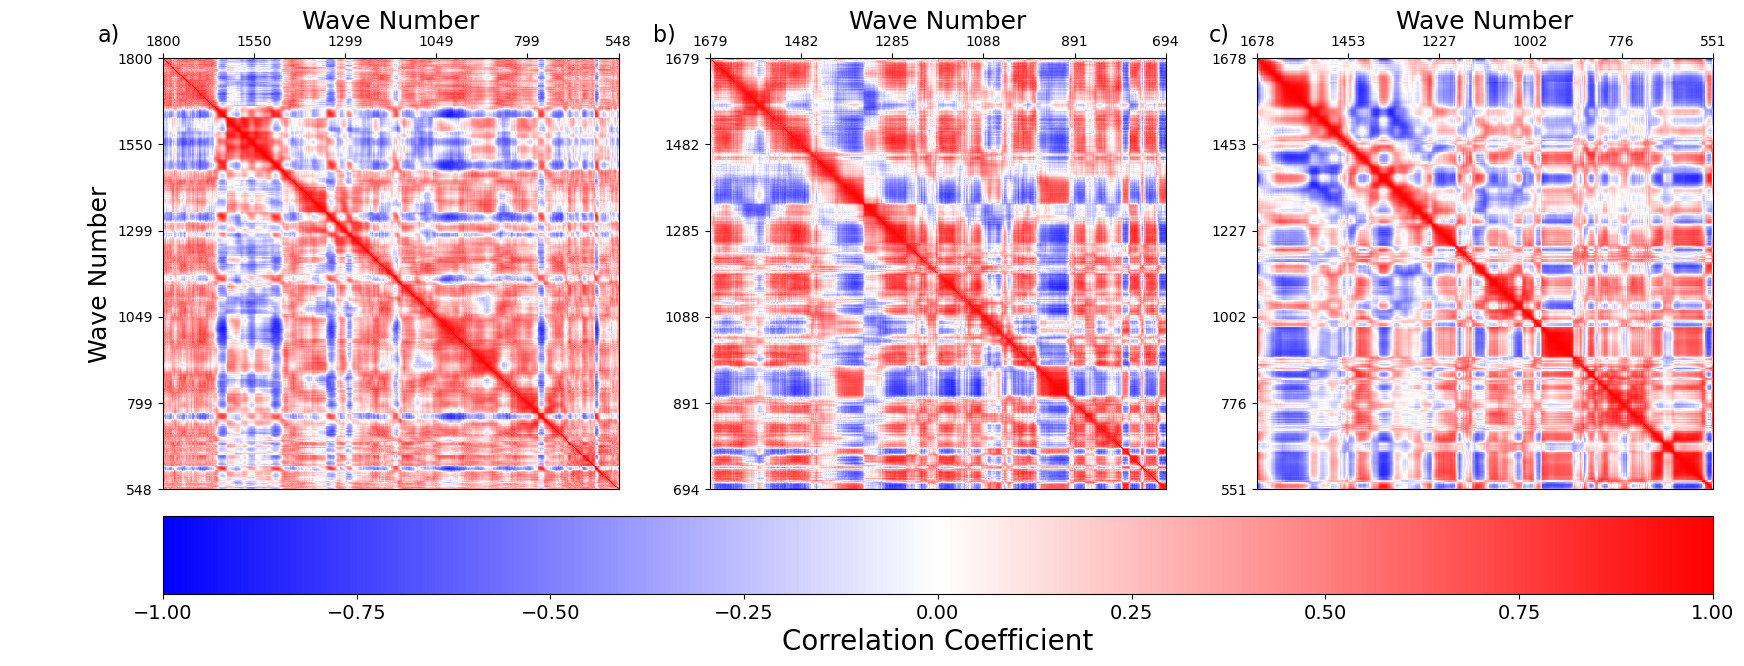

In [8]:
fig, ax = plt.subplots(1, 3, figsize = [20, 7])

font = {'size'   : 14}

plt.rc('font', **font)


#R6g


stwave = max(tempR6g.columns)
endwave = min(tempR6g.columns)

csc = ax[0].pcolormesh(corrR6g, vmin = -1, vmax = 1, cmap = "bwr");
ax[0].set_xlabel("Wave Number", size = 18)
ax[0].set_ylabel("Wave Number", size = 18)
ax[0].xaxis.set_label_position('top')

ticks_loc = np.linspace(0, np.shape(corrR6g)[0], 6)
ax[0].yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax[0].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ticklbls = np.linspace(stwave, endwave, 6)
ticklbls = ticklbls.astype(int)
ax[0].set_xticklabels(ticklbls)
ax[0].set_yticklabels(ticklbls)
ax[0].invert_yaxis()
ax[0].xaxis.tick_top()

fz = np.arctanh(corrR6g)
fz[fz == np.inf] = np.nan
fzavg = np.nanmean(fz)
ravg = np.tanh(fzavg)
ravg = round(ravg, 4)


#Triclosan
stwave = max(tempTri.columns)
endwave = min(tempTri.columns)

ax[1].pcolormesh(corrTri, vmin = -1, vmax = 1, cmap = "bwr");
ax[1].set_xlabel("Wave Number", size = 18)
ax[1].set_ylabel("")
ax[1].xaxis.set_label_position('top')

ticks_loc = np.linspace(0, np.shape(corrTri)[1], 6)
ax[1].yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax[1].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ticklbls = np.linspace(stwave, endwave, 6)
ticklbls = ticklbls.astype(int)
ax[1].set_xticklabels(ticklbls)
ax[1].set_yticklabels(ticklbls)
ax[1].invert_yaxis()
ax[1].xaxis.tick_top()

ax[1].annotate()

fz = np.arctanh(corrTri)
fz[fz == np.inf] = np.nan
fzavg = np.nanmean(np.nanmean(fz))
ravg = np.tanh(fzavg)
ravg = round(ravg, 4)


#Chlorpyrifos

thresh = abs(corr)>0.75

stwave = max(tempChlor.columns)
endwave = min(tempChlor.columns)

ax[2].pcolormesh(corrChlor, vmin = -1, vmax = 1, cmap = "bwr");
ax[2].set_xlabel("Wave Number", size = 18)
ax[2].set_ylabel("")
ax[2].xaxis.set_label_position('top')

ticks_loc = np.linspace(0, np.shape(corrChlor)[1], 6)
ax[2].yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax[2].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ticklbls = np.linspace(stwave, endwave, 6)
ticklbls = ticklbls.astype(int)
ax[2].set_xticklabels(ticklbls)
ax[2].set_yticklabels(ticklbls)
ax[2].invert_yaxis()
ax[2].xaxis.tick_top()

fz = np.arctanh(corrChlor)
fz[fz == np.inf] = np.nan
fzavg = np.nanmean(fz)
ravg = np.tanh(fzavg)
ravg = round(ravg, 4)

plt.annotate('a)', xy = (70, 450), xycoords = 'figure points', fontsize = 16, annotation_clip = False)
plt.annotate('b)', xy = (470, 450), xycoords = 'figure points', fontsize = 16, annotation_clip = False)
plt.annotate('c)', xy = (870, 450), xycoords = 'figure points', fontsize = 16, annotation_clip = False);

cb = fig.colorbar(csc, ax = ax[:], location = 'bottom', pad = 0.05);
cb.set_label( 'Correlation Coefficient', size = 20)
#plt.savefig("Tables and Figures/SVG Files/Correlation Plots.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures/PNG Files/Correlation Plots.png", format = "png", bbox_inches='tight')

In [9]:
corrR6g.iloc[-22, :].sort_values()

1030.169922   -0.810013
1038.287109   -0.795060
1024.755859   -0.792716
1032.876953   -0.789749
1035.582031   -0.787106
                 ...   
766.308594     0.813777
771.890625     0.825944
769.099609     0.830095
611.398438     0.912033
608.554688     1.000000
Name: 608.554688, Length: 472, dtype: float64